# TP sur la résolution des systèmes linéaires (n équations et n inconnues)

Après les systèmes non linéaires, nous avons vu dans le cours qu'il existe un type de système d'ordre n avec n entier positif et dont l'expression pour sa résolution se présente sous la forme Ax=b, ce système nous l'appelons système linéaire.

Une meilleure façon de l'interpréter serait de dire : 

- La matrice A est dite régulière ou non singulière si son déterminant est différent de zéro 
- le point précédent nous emmène à conclure qu'il y a existence et unicité de la solution x 
- et la solution x est valable pour n'importe quel vecteur de b donnée

Outre cela, nous savons aussi que théoriquement si A est régulière alors il suffit d'appliquer la formule de Cramer afin de déterminer les valeurs de Xi et ce, pour tout i allant de 1 à n :

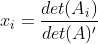

Mais seulement, lors de la résolution pratique des systèmes, on se rendra très vite compte que l'application de cette alternative est beaucoup trop couteuse car d'ordre (n+1)! opérations élémentaires, le calcul de chaque déterminant requiert n! opérations élémentaires. Concrètement je dirai que si mon ordinateur effectue 10 puissance 9 opérations élémentaires par seconde alors, il me faudra patienter 9,6*10puissance47 années pour résoudre un système d'équation de seulement 50 équations et ce n'est certainement pas ce que je souhaite.

Voilà pourquoi depuis le début de ce cours, il était prévu que nous voyons deux méthodes de résolutions des sytèmes qui permettent de pallier à cette sistuation il s'agit notamment des méthodes directes et indirectes.

Alors que dans le deuxième TP nous avions implémenté des << méthodes itératives dans R >> pour les systèmes non linéaires, dans la suite de ce Notebook nous allons implémenter les méthodes dites indirectes (ayant des calculs sans erreurs et qui donne la solution exacte x en nombre fini d'opérations) et, des méthodes itératives (celles qui ont pour but de construire une suite de vecteurs Xn convergeant vers la solution exacte x )  .

Nous verrons alors les méthodes suivantes :

   ### I. les méthodes directes
    ************************
    A) résolution des systèmes triangulaires :
        1) La méthode de la remontée : elle se condition par le fait que la matrice de départ doit être triangulaire 
        supérieur
        2) La méthode de la descente : elle se condition par le fait que la matrice de départ doit être triangulaire 
        supérieur
            
        Ces deux algorithmes ont pour nombre de multiplication et de division n(n+1)/2 et le nombre d'additions et 
        de soustractions est de
        n(n-1)/2 donc ... il s'agit d'algorithme d'ordre n^2 opérations élémentaires.
        
    B) méthode d'élimination de Gauss-Jordan:
        c'est la construction progressive pour l'obtention d'une matrice triangulaire supérieur U à la suite de 
        combinaison linéaires.
        On part d'une matrice A qui doit être régulière de taille n x n (linéaire).
        Cet algorithme nécessite un total de (n(n-1))/2 divisions, ((n^3)-n)/3 multiplications et ((n^3)-n)/3 additions 
        autrement, il faudrait 2*(((n^3)-n)/3)+n((n-1)/2) soit une complexité d'ordre ((2n)^3)/3 opérations élémentaires.
        
   ### II. les méthodes itératives
    ***************************
    
    N.B. nous nous intéresserons à leur compléxité et leur condition de convergence le reste sera détillé plus bas.
    
    1) Jacobi : On dit de Jacobi qu'elle converge vers la solution du système si la matrice de départ possède des
    éléments diagonaux non nuls et où ces mêmes éléments sont à diagonale strictement dominante et cela nous rassure 
    qu'on se rapprochera de plus en plus d'une matrice diagonale. sa complexité est de 3(n^2)+2n par itération. 
    Elle converge moins vite que la suivante. nous le prouverons plus loin.
    
    2) Gauss-Seidel : On dit que la méthode de Gauss Seidel converge lorsque la matrice de départ est 
    à diagonale strictement dominante, symétrique et, définit positive ainsi les termes diagonaux seront donc 
    eux aussi positifs. Sa complexité est d'ordre n^2.
    
    3) Relaxation : Il s'agit d'une variante de la précédente et de plus, cette méthode permet à gauss seidel de converger. 
    Nous retenons qu'elle est d'ordre 
    
    Conditions d'arrêts : En plus simple je dirai que pour les 3 méthodes, on s'arrête lorsqu'à chaque itération i 
    et i suivant on trouve les mêmes valeurs.
    

***********
I. Résolution d'un système linéaire triangulaire

In [120]:
import numpy as np

*********
I.I. Méthode de résolution pour une matrice triangulaire supérieur
*********

In [370]:
################### méthode de la remontée
def remontee(A,b,n):
    X=np.zeros([n])
    X[n-1]=b[n-1]/A[n-1,n-1]
    print("X("+str(n)+") = "+ str(X))
    for i in range(n-2,-1,-1):
        sum=np.dot(A[i,:],X)
        c=b[i]
        y=A[i,i]
        X[i]=(c-sum)/y
        print("X("+str(i+1)+") = "+ str(X))
    return X
################### vérification des conditions
def trisup(A,b):
    A=np.array(A)
    C=np.triu(A)
    print("La matrice entrée : ")
    print(A)
    b=np.array(b) 
    n=len(A)
    m=len(A[0])
    nb=len(b)
    for i in range(0,n):
        for j in range(0,n):
            aij=A[i,j]
            cij=C[i,j]
            if (aij!=cij) : 
                print("impossible de résoudre ce système car la matrice n`est pas triangulaire supérieur")
                print("Voulez-vous la rendre triangulaire supérieur ? (y (pour oui) / autre chose (pour non)): ")
                ans=""
                ans=input(ans)
                if(ans=='y'):
                    A=np.triu(A)
                    print(A)
                    break                    
                else: 
                    return ('FIN!')
    if n!=m or nb!=n:
        print("Il y 'a un soucis, vérifier que : la matrice A soit nxn ou que A et b soient compatibles")
    else:
        remontee(A,b,n)

    

Dans le cas où notre matrice n'est pas triangulaire supérieur l'algorithme ou la méthode de la remontée est sensé ne pas s'executer mais seulement et spécialement dans ce travail, nous nous proposons en bonus d'offrir la possibilité de la rendre treiangulaire pour pouvoir executer l'algorithme ou pas, selon que l'utilisateur le désir ou pas :

In [368]:
A=([[1,2,3],[2,1,3],[2,3,1]])
b=([3,2,1])
trisup(A,b)

La matrice entrée : 
[[1 2 3]
 [2 1 3]
 [2 3 1]]
impossible de résoudre ce système car la matrice n`est pas triangulaire supérieur
Voulez-vous la rendre triangulaire supérieur ? (y (pour oui) / autre chose (pour non)): 
non


'FIN!'

Dans le cas où notre matrice n'est pas triangulaire supérieur mais qu'on se propose de la rendre triangulaire supérieure voici ce qui se passe :

In [371]:
A=([[1,2,3],[2,1,3],[2,3,1]])
b=([3,2,1])
trisup(A,b)
%timeit()

La matrice entrée : 
[[1 2 3]
 [2 1 3]
 [2 3 1]]
impossible de résoudre ce système car la matrice n`est pas triangulaire supérieur
Voulez-vous la rendre triangulaire supérieur ? (y (pour oui) / autre chose (pour non)): 
y
[[1 2 3]
 [0 1 3]
 [0 0 1]]
X(3) = [ 0.  0.  1.]
X(2) = [ 0. -1.  1.]
X(1) = [ 2. -1.  1.]
10000000 loops, best of 3: 20.5 ns per loop


Interprétation :
Avec la matrice A et le vecteur b ci-haut nous dirons que :

- Quand X(3) = 1, X(2) et X(1) sont inconnus
- Quand X(3) est connu, on peut trouver X(2), ainsi X(2)=-1 et X(1) est toujours inconnu
- Enfin connaissant les valeurs de X(3), X(2) on peut trouver la valeur de X(1) et de ce fait, X(1) = 2.

D'où nous avons 
X(3)=1,
X(2)=-1,
X(1)=2


Dans le cas où notre matrice est triangulaire :

In [7]:
A=([[1,2,3],[0,1,3],[0,0,1]])
b=([3,2,1])
trisup(A,b)

La matrice entrée : 
[[1 2 3]
 [0 1 3]
 [0 0 1]]
X(3) = [ 0.  0.  1.]
X(2) = [ 0. -1.  1.]
X(1) = [ 2. -1.  1.]


Dans cet exemple, on s'aperçoit qu'avec une matrice triangulaire, on applique directement la méthode de la remontée.

Concernant l'interprétation du résultat, nous reprenant les mêmes explications précédement indiqués :

- Quand X(3) = 1, X(2) et X(1) sont inconnus
- Quand X(3) est connu, on peut trouver X(2), ainsi X(2)=-1 et X(1) est toujours inconnu
- Enfin connaissant les valeurs de X(3), X(2) on peut trouver la valeur de X(1) et de ce fait, X(1) = 2.

D'où nous avons 
X(3)=1,
X(2)=-1,
X(1)=2

et c'est tout pour la résolution d'un système linéaire trinagulaire.
Passant à présent aux systèmes linéaire trieangulaire inférieur.
**********************************

******************************
I.II. Méthode de résolution pour une matrice inférieur
*******************************

In [379]:
################### méthode de la descente
def descente(A,b,n):
    Y=np.zeros([n])
    Y[0]=b[0]/A[0,0]
    print("Y("+str(1)+") = "+ str(Y))
    for i in range(1,n,1):
        sum=np.dot(A[i,:],Y)
        c=b[i]
        y=A[i,i]
        Y[i]=(c-sum)/y
        print("Y("+str(i+1)+") = "+ str(Y))
    return Y
################### vérification des conditions
def trinf(A,b):
    A=np.array(A)
    C=np.tril(A)
    print("La matrice entrée : ")
    print(A)
    b=np.array(b) 
    print("Le vecteur b entré : ")
    print(b)
    n=len(A)
    m=len(A[0])
    nb=len(b)
    for i in range(0,n):
        for j in range(0,n):
            aij=A[i,j]
            cij=C[i,j]
            if (aij!=cij) : 
                print("impossible de résoudre ce système car la matrice n`est pas triangulaire inférieur")
                print("Voulez-vous la rendre triangulaire inférieur ? (y (pour oui) / autre chose (pour non)): ")
                ans=""
                ans=input(ans)
                if(ans=='y'):
                    A=np.tril(A)
                    print(A)
                    break                    
                else: 
                    return ('FIN!')
    if n!=m or nb!=n:
        print("Il y 'a un soucis, vérifier que : la matrice A soit nxn ou que A et b soient compatibles")
    else:
        descente(A,b,n)

    

Même procédé que pour la triangulaire supérieur :

In [350]:
A=([[1,2,3],[2,1,3],[2,3,1]])
b=([3,2,1])
trinf(A,b)

La matrice entrée : 
[[1 2 3]
 [2 1 3]
 [2 3 1]]
Le vecteur b entré : 
[3 2 1]
impossible de résoudre ce système car la matrice n`est pas triangulaire inférieur
Voulez-vous la rendre triangulaire inférieur ? (y (pour oui) / autre chose (pour non)): 
non


'FIN!'

avec transformation en une matrice inférieur :

In [380]:
A=([[1,2,3],[2,1,3],[2,3,1]])
b=([3,2,1])
trinf(A,b)
%timeit()

La matrice entrée : 
[[1 2 3]
 [2 1 3]
 [2 3 1]]
Le vecteur b entré : 
[3 2 1]
impossible de résoudre ce système car la matrice n`est pas triangulaire inférieur
Voulez-vous la rendre triangulaire inférieur ? (y (pour oui) / autre chose (pour non)): 
y
[[1 0 0]
 [2 1 0]
 [2 3 1]]
Y(1) = [ 3.  0.  0.]
Y(2) = [ 3. -4.  0.]
Y(3) = [ 3. -4.  7.]
10000000 loops, best of 3: 25.5 ns per loop


Dans cet exemple et à l'inverse de la méthode de la remontée, on s'aperçoit qu'avec une matrice triangulaire inférieur, on applique directement la méthode de la descente.

Concernant l'interprétation du résultat, nous reprenant les mêmes explications que précédement :

- Quand X(1) = 3, X(2) et X(3) sont inconnus
- Quand X(1) est connu, on peut trouver X(2), ainsi X(2)=-4 et X(3) est toujours inconnu
- Enfin connaissant les valeurs de X(1), X(2) on peut trouver la valeur de X(3) et de ce fait, X(3) = 7.

D'où nous avons X(1)=3, X(2)=-4, X(3)=7

on peut aussi souligner le fait que la méthode de la descente a prit 3.4ns de plus de temps d'execution soit 22.6 contrairement à celle de la remontée qui n'a prit que 19.2

et c'est tout pour la résolution d'un système linéaire trinagulaire inférieur.
************************

******************
III. Les méthodes itératives par la l'approche matricielle

Avant de présenter la résolution d'un système linéaire par la méthode de Gauss, nous faisons un petit tour dans les méthodes itératives.

nous verrons très rapidement comment peuvent être mis en oeuvre Jacobi, Gauss-Seidel et relaxation uniquement par approche matricielle car pour faute de temps nous ne pourrions mieux offrir.

Tout d'abord nous aurons besoin de la logique des matrices D, L et U tel que utilisé dans le TP précédent que nous reprenons ici :


In [11]:
A=([4,1,2],[1,4,2],[2,1,4])
A=np.array(A)
n=len(A)
if len(A[0])!=n:
    raise Exception('La matrice n`est pas n x n') 
print(">>>>>>>>>>La matrice A de dimension " + str(n) + " est :" )
print(A)
D=A*np.eye(n)
D=np.array(D)
print(">>>>>>>>>>La matrice Diagonale D est : ")
print(D)    
L=np.tril(A)-D
print(">>>>>>>>>>La matrice Triangulaire inférieur L est : ")
print(L)    
U=A-D-L
print(">>>>>>>>>>La matrice Triangulaire supérieur U est : ")
print(U)
b=np.array([1,0,2])

>>>>>>>>>>La matrice A de dimension 3 est :
[[4 1 2]
 [1 4 2]
 [2 1 4]]
>>>>>>>>>>La matrice Diagonale D est : 
[[ 4.  0.  0.]
 [ 0.  4.  0.]
 [ 0.  0.  4.]]
>>>>>>>>>>La matrice Triangulaire inférieur L est : 
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  1.  0.]]
>>>>>>>>>>La matrice Triangulaire supérieur U est : 
[[ 0.  1.  2.]
 [ 0.  0.  2.]
 [ 0.  0.  0.]]


III.1 JACOBI : 

In [12]:
c = -np.linalg.inv(D)@(L+U)
d = np.linalg.inv(D)@b
X = np.zeros(n)
print("résolution du système selon JACOBI à 65 itérations ")
for i in range(65) :
    X = c@X+d
    print(X)
%timeit()

résolution du système selon JACOBI à 65 itérations 
[ 0.25  0.    0.5 ]
[ 0.     -0.3125  0.375 ]
[ 0.140625 -0.1875    0.578125]
[ 0.0078125  -0.32421875  0.4765625 ]
[ 0.09277344 -0.24023438  0.57714844]
[ 0.02148438 -0.31176758  0.51367188]
[ 0.07110596 -0.26220703  0.56719971]
[ 0.0319519  -0.30137634  0.52999878]
[ 0.0603447  -0.27298737  0.55936813]
[ 0.03856277 -0.29477024  0.53807449]
[ 0.05465531 -0.27867794  0.55441117]
[ 0.0424639  -0.29086941  0.54234183]
[ 0.05154644 -0.28178689  0.5514854 ]
[ 0.04470402 -0.28862931  0.5446735 ]
[ 0.04982058 -0.28351276  0.54980532]
[ 0.04597553 -0.2873578   0.5459679 ]
[ 0.0488555  -0.28447783  0.54885169]
[ 0.04669362 -0.28663972  0.54669171]
[ 0.04831408 -0.28501926  0.54831312]
[ 0.04709825 -0.28623508  0.54709778]
[ 0.04800988 -0.28532345  0.54800964]
[ 0.04732604 -0.28600729  0.54732592]
[ 0.04783886 -0.28549447  0.5478388 ]
[ 0.04745422 -0.28587912  0.54745419]
[ 0.04774269 -0.28559065  0.54774267]
[ 0.04752633 -0.28580701  0.547526

III.2 GAUSS-SEIDEL : 

In [13]:
c = -np.linalg.inv(D+L)@U
d = np.linalg.inv(D+L)@b
X = np.zeros(n)
print("résolution du système selon GAUSS-SEIDEL à 18 itérations ")
for i in range(18) :
    X = c@X+d
    print(X)
%timeit()

résolution du système selon GAUSS-SEIDEL à 18 itérations 
[ 0.25     -0.0625    0.390625]
[ 0.0703125  -0.21289062  0.51806641]
[ 0.04418945 -0.27008057  0.54542542]
[ 0.04480743 -0.28391457  0.54857492]
[ 0.04669118 -0.28596026  0.54814447]
[ 0.04741783 -0.28592669  0.54777276]
[ 0.04759529 -0.2857852   0.54764865]
[ 0.04762197 -0.28572982  0.54762147]
[ 0.04762172 -0.28571616  0.54761818]
[ 0.04761995 -0.28571408  0.54761854]
[ 0.04761925 -0.28571408  0.5476189 ]
[ 0.04761907 -0.28571422  0.54761902]
[ 0.04761905 -0.28571427  0.54761904]
[ 0.04761905 -0.28571428  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
100000000 loops, best of 3: 18.9 ns per loop


III.3 RELAXATION : 

In [14]:
# avec alpha=1 on retrouvera le même résultat obtenu par gauss-seidel 
alpha=1
c = np.linalg.inv(D+(alpha * L))@((1-alpha)*D-(alpha*U))
d = alpha*np.linalg.inv(D+alpha*L)@b
X = np.zeros(n)
print("résolution du système selon RELAXATION à 18 itérations ")
for i in range(18) :
    X = c@X+d
    print(X)
%timeit()

résolution du système selon RELAXATION à 18 itérations 
[ 0.25     -0.0625    0.390625]
[ 0.0703125  -0.21289062  0.51806641]
[ 0.04418945 -0.27008057  0.54542542]
[ 0.04480743 -0.28391457  0.54857492]
[ 0.04669118 -0.28596026  0.54814447]
[ 0.04741783 -0.28592669  0.54777276]
[ 0.04759529 -0.2857852   0.54764865]
[ 0.04762197 -0.28572982  0.54762147]
[ 0.04762172 -0.28571616  0.54761818]
[ 0.04761995 -0.28571408  0.54761854]
[ 0.04761925 -0.28571408  0.5476189 ]
[ 0.04761907 -0.28571422  0.54761902]
[ 0.04761905 -0.28571427  0.54761904]
[ 0.04761905 -0.28571428  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
100000000 loops, best of 3: 19 ns per loop


In [15]:
# avec alpha<>0 on trouvera un résultat différent de gauss-seidel 
alpha=0.8888
c = np.linalg.inv(D+(alpha * L))@((1-alpha)*D-(alpha*U))
d = alpha*np.linalg.inv(D+alpha*L)@b
X = np.zeros(n)
print("résolution du système selon RELAXATION à 18 itérations ")
for i in range(18) :
    X = c@X+d
    print(X)
%timeit()

résolution du système selon RELAXATION à 18 itérations 
[ 0.2222     -0.04937284  0.35662497]
[ 0.09939515 -0.18606     0.48122802]
[ 0.06073754 -0.24804349  0.52603606]
[ 0.05029885 -0.27252926  0.5410984 ]
[ 0.04788511 -0.28140945  0.54581918]
[ 0.04749196 -0.28440749  0.54718501]
[ 0.04750743 -0.28535128  0.54753973]
[ 0.04756123 -0.28562582  0.54761627]
[ 0.0475942  -0.28569769  0.54762609]
[ 0.04760947 -0.28571344  0.5476239 ]
[ 0.04761564 -0.28571559  0.54762139]
[ 0.04761792 -0.28571522  0.54762002]
[ 0.0476187  -0.28571474  0.54761941]
[ 0.04761895 -0.28571448  0.54761917]
[ 0.04761902 -0.28571436  0.54761909]
[ 0.04761904 -0.28571431  0.54761906]
[ 0.04761905 -0.28571429  0.54761905]
[ 0.04761905 -0.28571429  0.54761905]
100000000 loops, best of 3: 19.5 ns per loop


INTERPRETATION :

- Constat :

Nous avons constaté qu'il y a un intérêt à utiliser les méthodes itératives par une approche basée sur la décomposition(splitting) de la matrice A sous la forme D et L avec D et L qui représente ici des matrices inversibles dite de préconditionnement, cet intérêt est qu'elles soient simples à programmer et n'cessitent donc sûrement moins d'espace mémoire contrairement à l'approche par calcul des éléments de de Xi et, aux méthodes directes. 

Par exemple pour jacobi il ne suffisait d'écrire que <<X=D^(-1)@L*X+D^(-1)@b>> et il nous a été précisé pendant le cours qu'il s'agissait là d'un cas particulier de la méthode de point fixe. 

- Temps d'execution :

Aussi chacune des méthodes implémentées ci-haut a un temps d'execution propre à elle, par exemple alors que GAUSS-SEIDEL prend plus de temps, soit 19.2,  JACOBI vient en deuxième position et ne prend que 18.9 puis ensuite RELAXATION qui prend 18.6 dans les deux cas.

- Comparaison des resultats :

On sait aussi par exemple que le but de la méthode de relaxation est de faire converger
la solution lorsque la méthode de gauss seidel diverge. On peut donc choisir un alpha qui soit compris entre [0 , 1] ainsi avec alpha=1 on retrouvera le même résultat obtenu dans gauss-seidel d'où les même résultats obtenus. 

Du reste :

* A partir de la 16ème itération, Relaxation avec alpha =0 trouve sa convergence.
* A partir de la 13ème itération, Relaxation avec alpha =1 trouve sa convergence.
* A partir de la 13ème itération, Gauss-Seidel trouve sa convergence.
* A partir de la 63ème itération, Jacobi trouve sa convergence.

La bonne nouvelle est de constater qu'à partir du moment où toutes ses méthodes convergent, X(1), X(2) et X(3) ont même valeurs respectivement selon la méthode.
Aussi la méthode de Gauss-Seidel semble être ici la plus optimal, du fait que cette dernière permet d'atteindre le résultat bien avant et pourtant c'est aussi cette même méthode qui prend plus de temps à s'executer.

Voici les valeurs obtenues :

X(1)=0.04761905 , X(2)=-0.28571429  , X(3)=0.54761905 BINGO!!!!
*****************

**************************************************************
II. Résolution d'un système linéaire par la méthode de GAUSS JORDAN

Le principe de cette méthode est simple, elle conciste juste à ramener par des opérations simples dites combinaisons linéaires à un système triangulaire supérieur et équivalent dont la résolution peut faire appel à la méthode de la remontée ou même toutes autres méthodes connues telles que substitution, par addition, etc. Dans notre contexte, nous nous fairons un plaisir d'utiliser la méthode de la remontée et de la descente implémentées ci-haut, il faudrait bien qu'elles servent à quelque chose.

Nous introduirons ici une forme de matrice bien particulière utilisée dans le cours, il s'agit de la fameuse matrice M.

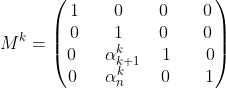

Conscient du fait qu'il n'est pas toujours simple d'analyser le code écrit par une autre personne et que des commentaires à eux seul ne suffisent pas, nous proposons ci-dessous une explication algorithmique du code que nous allons implémenter :

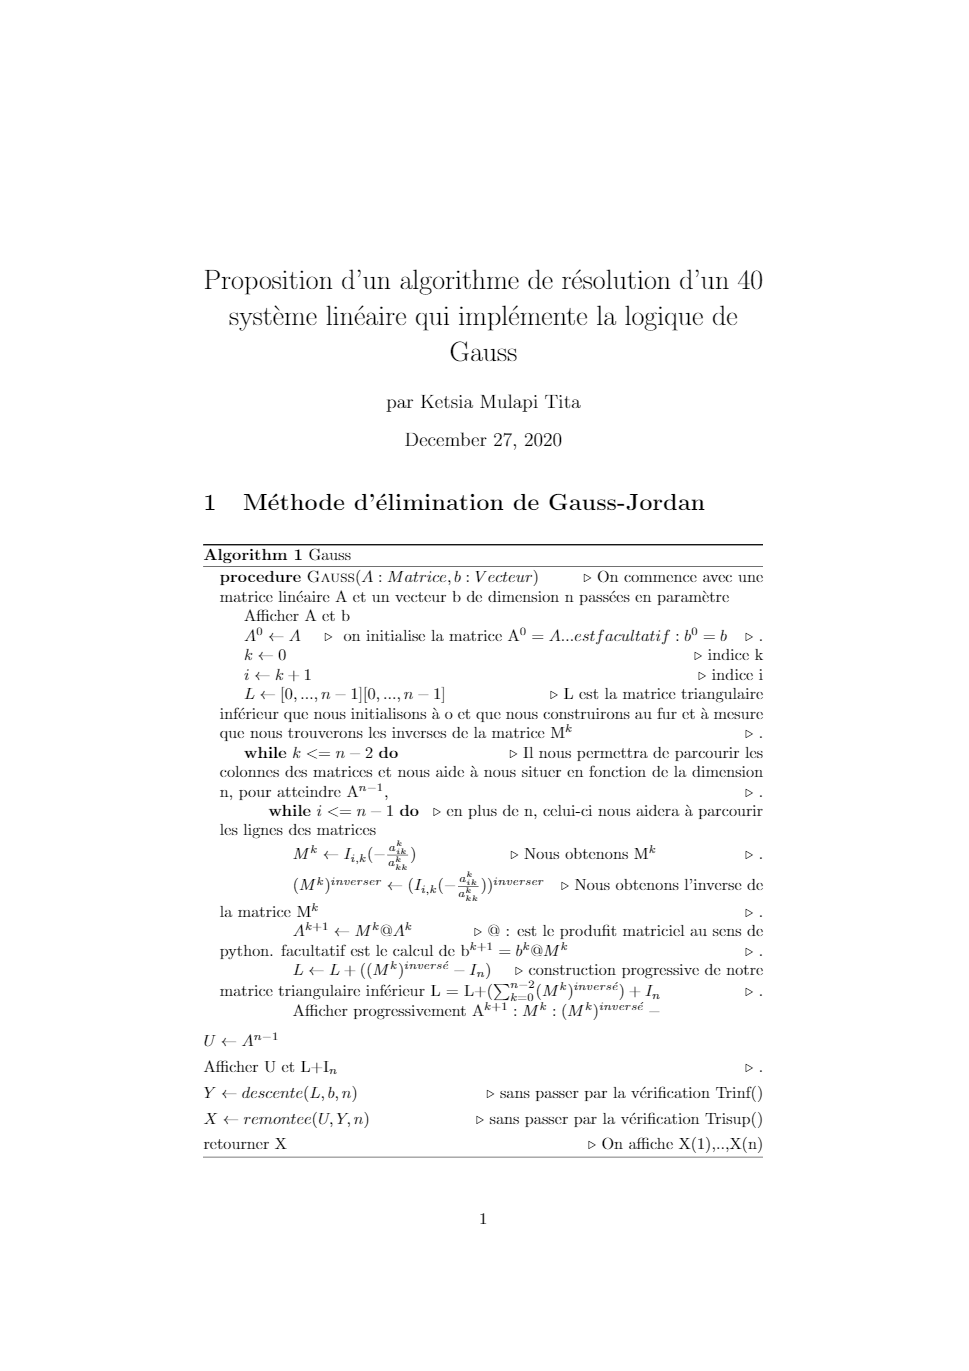

In [408]:
def T(n,i,j):
    if i>=n or j>=n or i<0 or j<0:
        raise Exception('Uncompatible dimension')
    T = np.eye(n)
    T[[j,i]]=T[[i,j]]
    return T

def D(n,i,l):
    if i>=n:
        raise Exception('Uncompatible dimension')
    A = np.eye(n)
    A[i,i] = l
    return A

def L(n,r,s,l):
    if r>=n or s>=n:
        raise Exception('Uncompatible dimension')
    A = np.eye(n)
    A[r,s] = l
    return A

def M(n,i,l):
    if len(l) != n-1-i or i>=n-1 or i<0:
        raise Exception('Uncompatible dimension')
    A = np.eye(n)
    A[i+1:,i]=l
    return A

In [385]:
def gauss(A,b):
    #
    #initialisation en matrice
    A=np.array(A)
    b=np.array(b)
    #
    #Conditions de linéarité
    n=len(A)
    m=len(A[0])
    nb=len(b)
    t=0
    L=np.zeros(n)
    U=np.zeros(n)
    Y=np.zeros(n)
    X=np.zeros(n)
    if n!=m or nb!=n:
        raise Exception("vérifier que A et b soient de dimension n")
    #
    #afficher les matrices reçues
    print("La matrice de départ A est : ")
    print(A)
    print("Le vecteur b est : ")
    print(b)
    #
    for i in range(n-1):
        print('\n----------')
        print('Itération',i)
        print('----------')
        print('Avant :')
        print("A("+str(t)+") : ")
        print(A)
        # Construction de la matrice M, M inveré et L
        l = -A[i+1:,i]/A[i,i]
        m = M(n,i,l)
        m_inv = M(n,i,-l)
        L=L+(m_inv-np.eye(n))
        print('\nAnnulation de la colonne',i)
        print('--------------------------')
        print('Avant :')
        print("A("+str(t)+") : ")
        print(A)
        # Construction des Ak
        A = m@A
        #
        print("\nM("+str(t)+") :")
        print(m)
        #
        if(i!=1): 
            print('\nAprès :')
            print("A("+str(t+1)+") : ")
            print(A)
        else:
            print('\n La matrice triangulaire supérieur :')
            print("U=A("+str(t+1)+") : ")
            U=A
            print(U)
        t=t+1
    print('\n La matrice triangulaire inférieure L :')
    L=L+np.eye(n)
    print(L)
    #Trouvons le vecteur Y
    print('\n Le vecteur Y est :')
    Y=descente(L,b,n)
    print(Y)
    print('\n Le vecteur X est :')
    X=remontee(U,Y,n)
    print(X)    

In [388]:
#Nous optons pour l'appel à la résolution, un exercice puisé dans les annales du cours
A=([[3,1,2],[1,2,3],[2,3,1]])
b=([1,0,0])
gauss(A,b)

La matrice de départ A est : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]
Le vecteur b est : 
[1 0 0]

----------
Itération 0
----------
Avant :
A(0) : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

Annulation de la colonne 0
--------------------------
Avant :
A(0) : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

M(0) :
[[ 1.          0.          0.        ]
 [-0.33333333  1.          0.        ]
 [-0.66666667  0.          1.        ]]

Après :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

----------
Itération 1
----------
Avant :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

Annulation de la colonne 1
--------------------------
Avant :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

M(1) :
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.  -1.4  1. ]]

 La matrice triangulaire supérieur :
U=A(2) : 
[[ 3. 

Les valeurs de X(1), X(2) et X(3) pour notre système sont 0.38888889, -0.27777778 et 0.05555556 respectivement.
******************************

*********************************
II. Implantez la méthode du calcul de l'inverse d'une matrice carrée A par "double triangulation", puis division des lignes par les éléments diagonaux.

Dans cette partie, il est question d'implenter une méthode qui calcul l'inverse d'une matrice A, et pour ce faire on doit effectuer une double triangulation c'est à dire obtenir une matrice à la fois triangulaire inférieur et supérieur donc diagonale puis, diviser chaque ligne par les éléments diagonaux et pour y arriver, nous pouvons partir de la méthode de gauss précédement illsutré, et proposer une démarche inverse afin d'obtenir des multiplications successives de A par M qui nous ont permises de trouver U et, de U par N pour trouver L(U) au final une matrie L qui sera Diagonale D, laquelle nous diviserons les lignes par les éléments diagonaux pour obtenir une matrice identité I. Une fois celle-ci trouvé, on pourra cocnlure que le produit matriciel de toutes les matrices M et N donne la matrice inverse de A que nous cherchons. Afin de parfaire ce notebook , nous tenterrons d'y répondre, du mieux que nous pourrons.

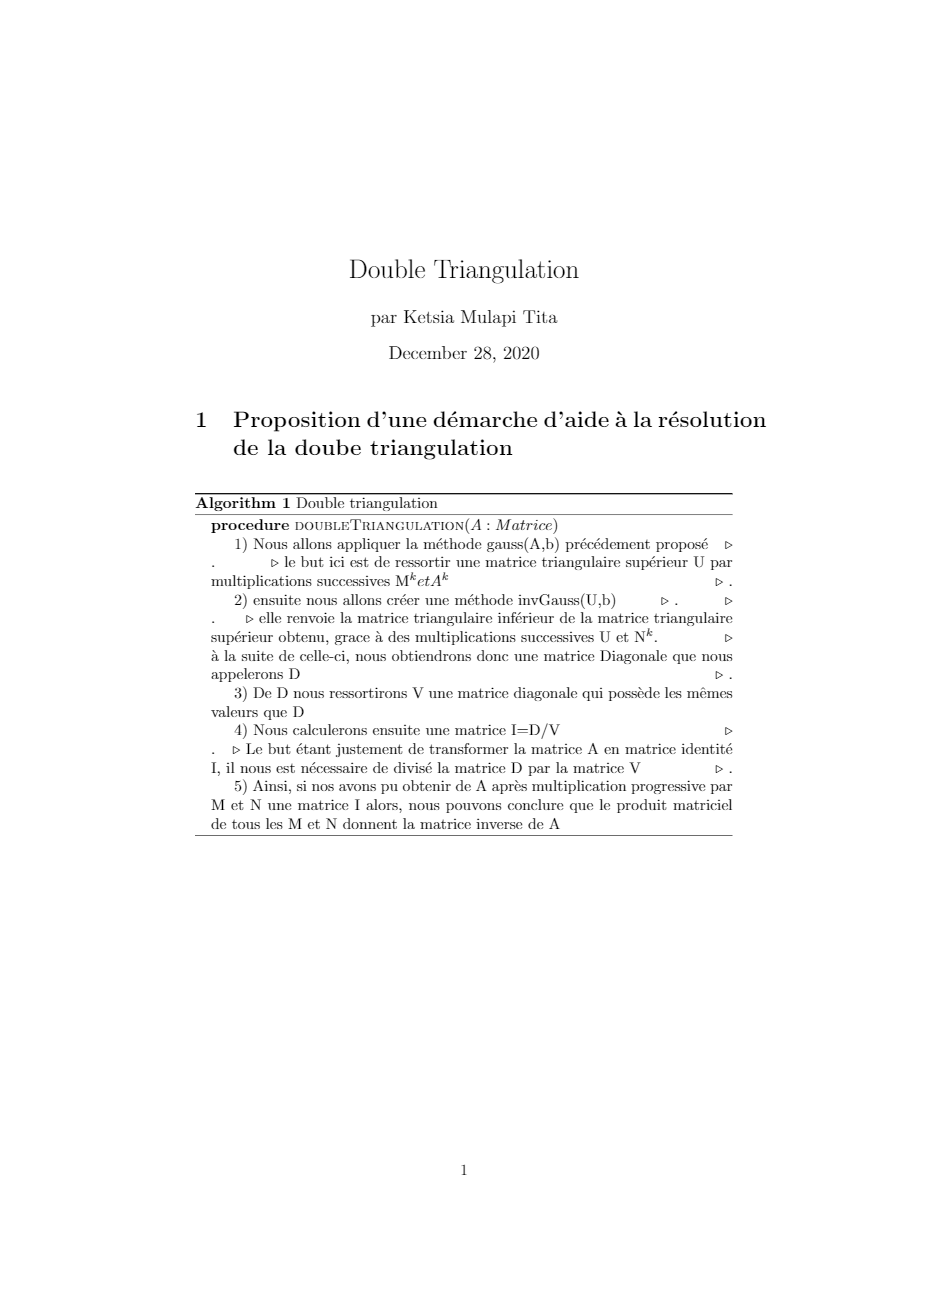

C'est bien compréhensible tout ça...sauf que maintenant nous devons passer à l'action !!!

In [409]:
def gauss(A):
    #
    #initialisation en matrice
    A=np.array(A)
    #
    #Conditions de linéarité
    n=len(A)
    m=len(A[0])
    t=0
    U=np.zeros(n)
    #PmInv=np.array([n][n])
    if n!=m :
        raise Exception("vérifier que A et b soient de dimension n")
    #
    #afficher les matrices reçues
    print("La matrice de départ A est : ")
    print(A)
    #
    for i in range(n-1):
        print('\n----------')
        print('Itération',i)
        print('----------')
        print('Avant :')
        print("A("+str(t)+") : ")
        print(A)
        # Construction de la matrice M, M inveré et L
        l = -A[i+1:,i]/A[i,i]
        m = M(n,i,l)
        m_inv = M(n,i,-l)
        #Pminv=L+(m_inv-np.eye(n))
        print('\nAnnulation de la colonne',i)
        print('--------------------------')
        print('Avant :')
        print("A("+str(t)+") : ")
        print(A)
        # Construction des Ak
        A = m@A
        #
        print("\nM("+str(t)+") :")
        print(m)
        #
        if(i!=1): 
            print('\nAprès :')
            print("A("+str(t+1)+") : ")
            print(A)
        else:
            print('\n La matrice triangulaire supérieur :')
            print("U=A("+str(t+1)+") : ")
            U=A
            print(U)
        t=t+1
    return U

In [410]:
A=([[3,1,2],[1,2,3],[2,3,1]])
U=gauss(A)

La matrice de départ A est : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

----------
Itération 0
----------
Avant :
A(0) : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

Annulation de la colonne 0
--------------------------
Avant :
A(0) : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

M(0) :
[[ 1.          0.          0.        ]
 [-0.33333333  1.          0.        ]
 [-0.66666667  0.          1.        ]]

Après :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

----------
Itération 1
----------
Avant :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

Annulation de la colonne 1
--------------------------
Avant :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

M(1) :
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.  -1.4  1. ]]

 La matrice triangulaire supérieur :
U=A(2) : 
[[ 3.          1.          2.     

In [510]:
def invGauss(U):
    #
    #initialisation en matrice
    A=U.copy()
    #
    L=np.tril(A)
    return L

In [511]:
D=invGauss(U)
print(D)

[[ 3.          0.          0.        ]
 [ 0.          1.66666667  0.        ]
 [ 0.          0.         -3.6       ]]


In [497]:
def MatDiag(D):
    V=np.diag(D)
    V=np.eye(len(D))*V
    return V

In [498]:
V=MatDiag(D)
print(V)

[[ 3.          0.         -0.        ]
 [ 0.          1.66666667 -0.        ]
 [ 0.          0.         -3.6       ]]


In [506]:
def MatId(D,V):
    I=np.dot(V,np.linalg.inv(D))
    return I

In [507]:
I=MatId(D,V)
print(I)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


***************************
Présentons cela autrement :
***************************

In [514]:
def doubleTriangulation(A):
    U=gauss(A)
    D=invGauss(U)
    V=MatDiag(D)
    I=MatId(D,V)
    print("**************************************************************************************************")
    print("**********************RECHERCHE DE LA MATRICE DIAGONALE TRIANGULAIRE INF**************************")
    print("**************************************************************************************************")
    print(D)
    print("**************************************************************************************************")
    print("***********************RECUPERATION DES TERMES DIAGONAUX DE D*************************************")
    print("**************************************************************************************************")
    print(V)
    print("**************************************************************************************************")
    print("*******CALCUL DE LA MATRICE IDENTITE DE A PAR DIVISION DES LIGNES PAR LES TERMES DIAGONAUX********")
    print("**************************************************************************************************")
    print(I)

In [515]:
A=([[3,1,2],[1,2,3],[2,3,1]])
doubleTriangulation(A)

La matrice de départ A est : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

----------
Itération 0
----------
Avant :
A(0) : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

Annulation de la colonne 0
--------------------------
Avant :
A(0) : 
[[3 1 2]
 [1 2 3]
 [2 3 1]]

M(0) :
[[ 1.          0.          0.        ]
 [-0.33333333  1.          0.        ]
 [-0.66666667  0.          1.        ]]

Après :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

----------
Itération 1
----------
Avant :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

Annulation de la colonne 1
--------------------------
Avant :
A(1) : 
[[ 3.          1.          2.        ]
 [ 0.          1.66666667  2.33333333]
 [ 0.          2.33333333 -0.33333333]]

M(1) :
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.  -1.4  1. ]]

 La matrice triangulaire supérieur :
U=A(2) : 
[[ 3.          1.          2.     

Bien qu'ayant trouvé la matrice identité, ce document ne serait être une référence parfaite du fait que nous ne pourrions conclure que le produit mariciel de toutes les matrices M et N ayant multipliées A jusqu'à l'obtention d'une matrice Diagonale D est égale à l'inverse de cette matrice A car d'autres part nous avons préféré passer, dans la mesure du possible par la bibliothèque numpy sans aborder les calculs de N mais du moins, l'idée est là.


### Et c'est par ici que s'achève notre parcours à la découverte des outils de résolutions des systèmes linéaires.